# Proyek Sistem Rekomendasi: [MovieLens Latest Datasets]
- **Nama:** Ulfa Stevi Juliana
- **Email:** steviulpa@Gmail.coom
- **ID Dicoding:** MC189D5X2331

#Import library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

#Data preparation

Pada tahap ini, dataset akan disiapkan sehingga siap untuk masuk ketahap permodelan

##Data loading

Pada tahap ini saya memuat dataset review hotel dengan format CSV. Dataset dapat diunduh pada link ini [Grouplens-MovieLens Latest Datasets](https://grouplens.org/datasets/movielens/latest/).

Pada tahap ini, dua file dataset utama dari MovieLens yaitu `movies.csv` dan `ratings.csv` dimuat ke dalam DataFrame.  
File `movies.csv` berisi informasi judul dan genre film, sedangkan `ratings.csv` berisi data rating dari setiap pengguna terhadap film tertentu.

In [ ]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


##Data understanding

###Melakukan pengecekan bentuk data

In [ ]:
print(f"dimensi dataset movies: {movies.shape}")
print(f"dimensi dataset ratings: {ratings.shape}")

dimensi dataset movies: (9742, 3)
dimensi dataset ratings: (100836, 4)


In [ ]:
print(f"informasi dataset movies: {movies.info()}")
print(f"Informasi dataset ratings: {ratings.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
informasi dataset movies: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
Informasi dataset ratings: None


insight :

In [ ]:
print(f"Jumlah variasi data genre di dataset movies: {movies['genres'].nunique()}")

Jumlah variasi data genre di dataset movies: 951


###Melakukan pengecekan missing values pada semua fitur

In [ ]:
print(f"Jumlah missing values pada dataset movies: {movies.isnull().values.sum()}")
print(f"Jumlah missing values pada dataset ratings: {ratings.isnull().values.sum()}")

Jumlah missing values pada dataset movies: 0
Jumlah missing values pada dataset ratings: 0


Insight : dapat dilihat bahwa tidak terdapat missing values

###Melihat persebaran data untuk setiap Rating **(1 hingga 5)**

Jumlah Film per Genre Individual:
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


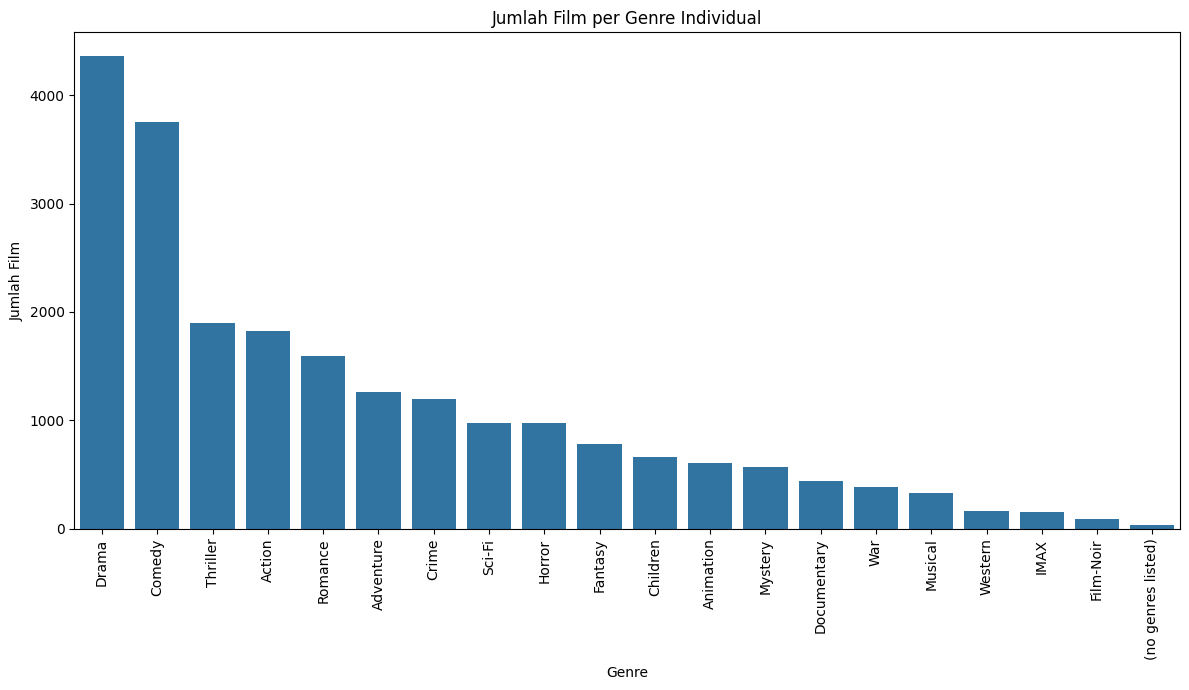

In [ ]:
# Import library yang dibutuhkan (pastikan sudah terinstall)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memisahkan genre dan menghitung frekuensi setiap genre
genres_split = movies['genres'].str.split('|', expand=True).stack()

# Menghitung jumlah film per genre individual
genre_counts = genres_split.value_counts()

print("Jumlah Film per Genre Individual:")
print(genre_counts)

plt.figure(figsize=(12, 7))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Jumlah Film per Genre Individual')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Insight : Distribusi genre menjadi lebih akurat setelah genre tiap film dipisahkan, karena banyak film memiliki lebih dari satu genre. Informasi ini penting untuk memahami preferensi genre secara menyeluruh, sehingga analisis tren dan rekomendasi film bisa lebih tepat sasaran.

<Axes: xlabel='rating', ylabel='count'>

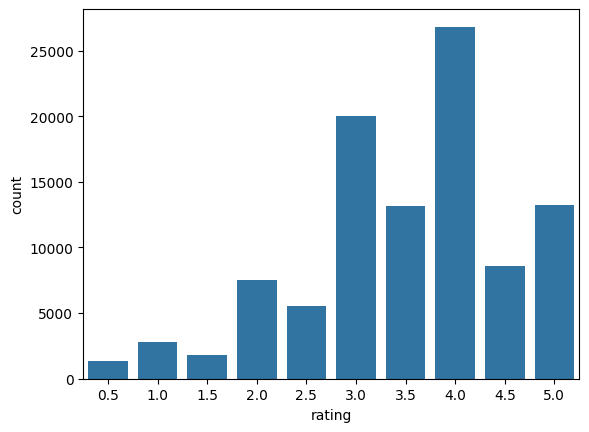

In [ ]:
sns.countplot(data=ratings,x='rating')

Insight : Grafik di bawah menunjukkan jumlah rating yang diberikan oleh pengguna pada skala 0.5 hingga 5.0.  
Terlihat bahwa sebagian besar pengguna memberikan rating yang cukup tinggi (sekitar 3.0 hingga 4.0), yang menunjukkan bahwa pengguna cenderung memberikan ulasan positif terhadap film.


#Data Preprosessing

Pada tahap ini, ada beberapa tahapan data preprosessing yang dilakukan, yaitu :
* Ekstraksi Genre Menjadi Kolom Biner     
* Menggabungkan datset Movies dan Ratings melalui kolom movieID

In [ ]:
movies_with_genres = pd.concat([movies, movies['genres'].str.get_dummies(sep='|')], axis=1)
df = ratings.merge(movies_with_genres, on='movieId')

In [ ]:
df.head()

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


#Data Spliting 70/30

Dataset df dibagi menjadi:

* df_train: 70% data untuk melatih model.

* df_test: 30% data untuk mengujinya nanti.

> random_state=42 digunakan agar pembagian data bersifat reproducible (hasil tetap jika dijalankan ulang).



In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

Sebelum masuk ke model, ada bebrapa tahapan yang harus dilakukan, yaitu :
* Pembuatan User-Item Rating Matrix
* Konversi Matriks ke Bentuk Sparse Matrix
* Pemetaan userId ke Index dan Sebaliknya

In [ ]:
# Buat user-item matrix dari data latih
train_matrix = df_train.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# Konversi ke bentuk sparse matrix
from scipy.sparse import csr_matrix
sparse_train_matrix = csr_matrix(train_matrix.values)

# Buat mapping dari userId ke index (dan sebaliknya)
user_id_to_index = {uid: idx for idx, uid in enumerate(train_matrix.index)}
index_to_user_id = {idx: uid for uid, idx in user_id_to_index.items()}

# Inisialisasi dan latih model KNN
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(sparse_train_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

Kode ini membentuk matriks rating user terhadap film, mengoptimalkannya dalam format sparse, dan melatih model KNN untuk menemukan user-user yang mirip berdasarkan preferensi rating.

#Model CF

Model ini menggunakan pendekatan Collaborative Filtering berbasis user-user similarity.

Prediksi rating dihitung berdasarkan rating yang diberikan oleh user lain yang mirip (tetangga terdekat).

- Fungsi untuk memprediksi rating yang akan diberikan oleh user terhadap sebuah film.
- Menggunakan KNN untuk mencari 'k' user yang paling mirip (berdasarkan cosine similarity).
- Menghitung rata-rata tertimbang dari rating tetangga terhadap film tersebut.


##Model Training

Fungsi `predict_rating_cf` digunakan untuk memprediksi rating yang mungkin diberikan oleh seorang user terhadap sebuah film berdasarkan kemiripan dengan user lain.  
Langkah-langkah di dalam fungsi ini mencakup:
- Mengambil tetangga terdekat dari user (menggunakan cosine similarity).
- Menghitung rata-rata tertimbang dari rating yang diberikan oleh user-user tetangga.
- Mengembalikan prediksi rating sebagai hasil dari kolaborasi antar user.

In [ ]:
def predict_rating_cf(user_id, movie_id, k=5):
    if movie_id not in train_matrix.columns or user_id not in user_id_to_index:
        return np.nan

    user_idx = user_id_to_index[user_id]

    # Cari tetangga terdekat
    distances, indices = model_knn.kneighbors(sparse_train_matrix[user_idx], n_neighbors=k+1)

    # Buang diri sendiri
    neighbors = indices.flatten()[1:]
    weights = 1 - distances.flatten()[1:]  # dari jarak ke kemiripan

    total_sim, weighted_sum = 0, 0
    for idx, weight in zip(neighbors, weights):
        neighbor_id = index_to_user_id[idx]
        rating = train_matrix.loc[neighbor_id, movie_id]
        if rating > 0:
            weighted_sum += weight * rating
            total_sim += weight

    if total_sim == 0:
        return np.nan

    return weighted_sum / total_sim


##Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error

actual_cf, predicted_cf = [], []

for row in df_test.itertuples():
    pred = predict_rating_cf(row.userId, row.movieId)
    if not np.isnan(pred):
        actual_cf.append(row.rating)
        predicted_cf.append(pred)

mae_cf = mean_absolute_error(actual_cf, predicted_cf)
print(f"MAE CF: {mae_cf:.4f}")


MAE CF: 0.8228


Insight :Nilai MAE sebesar 0.8228 menunjukkan bahwa, rata-rata kesalahan prediksi rating oleh model Collaborative Filtering (CF) adalah sekitar 0.82 poin pada skala rating.

Ini berarti model cukup baik dalam menangkap preferensi pengguna, namun masih terdapat deviasi hampir 1 poin antara prediksi dan rating sebenarnya.

##Model Testing

In [ ]:
def get_top_k_recommendations_cf(user_id, k=10):
    if user_id not in train_matrix.index:
        return f"UserId {user_id} tidak ditemukan dalam data latih."

    unrated_movies = train_matrix.columns[train_matrix.loc[user_id] == 0]
    recommendations = []
    for movie_id in unrated_movies:
        pred_rating = predict_rating_cf(user_id, movie_id)
        if not np.isnan(pred_rating):
            recommendations.append((movie_id, pred_rating))

    top_k = sorted(recommendations, key=lambda x: x[1], reverse=True)[:k]
    movie_titles = df[['movieId', 'title']].drop_duplicates().set_index('movieId')

    print(f"CF Rekomendasi untuk userId={user_id}:")
    for movie_id, rating in top_k:
        title = movie_titles.loc[movie_id]['title']
        print(f"{title}: Prediksi rating {rating:.2f}")

In [ ]:
get_top_k_recommendations_cf(user_id=2, k=10)

CF Rekomendasi untuk userId=2:
Pulp Fiction (1994): Prediksi rating 5.00
Trainspotting (1996): Prediksi rating 5.00
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981): Prediksi rating 5.00
Shining, The (1980): Prediksi rating 5.00
Indiana Jones and the Last Crusade (1989): Prediksi rating 5.00
American History X (1998): Prediksi rating 5.00
Memento (2000): Prediksi rating 5.00
Donnie Darko (2001): Prediksi rating 5.00
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001): Prediksi rating 5.00
Vanilla Sky (2001): Prediksi rating 5.00


Insight :

* Semua film direkomendasikan dengan prediksi rating maksimal (5.00), yang berarti:

    * User-user tetangga yang mirip memberikan rating tinggi pada film tersebut.

    * Model sangat yakin bahwa userId=2 juga akan menyukai film-film ini.

* Film yang direkomendasikan sebagian besar adalah film klasik populer dan kultus, seperti:

    * Pulp Fiction, The Shining, Memento, Donnie Darko.

    * Ini mengindikasikan userId=2 mungkin memiliki preferensi terhadap film-film drama, thriller, atau misteri dengan rating tinggi.

#Model Hybrid

Model Hybrid menggabungkan dua pendekatan rekomendasi:

* Collaborative Filtering (CF): memprediksi rating berdasarkan user lain yang mirip.

* Content-Based Filtering: memprediksi rating berdasarkan kesesuaian genre film dengan preferensi user.

##Model Training

Fungsi `predict_rating_hybrid` digunakan untuk memprediksi rating yang mungkin diberikan oleh seorang user terhadap sebuah film dengan menggabungkan dua pendekatan, yaitu Collaborative Filtering dan Content-Based Filtering.

Langkah-langkah utama dalam fungsi ini meliputi:
- Menghitung skor Collaborative Filtering berdasarkan rating dari user tetangga terdekat menggunakan cosine similarity.
- Menghitung skor berbasis genre dengan mengalikan profil preferensi genre user dan profil genre film.
- Menggabungkan kedua skor tersebut menggunakan bobot `alpha` untuk mendapatkan prediksi rating akhir.
- Jika salah satu skor tidak tersedia, fungsi akan menggunakan skor yang ada sebagai prediksi.

Parameter `alpha` mengatur proporsi kontribusi Collaborative Filtering dalam prediksi akhir.


In [ ]:
# Gabungkan data training dengan genre
df_train = df_train.merge(movies_with_genres, on='movieId')

# Ambil hanya kolom genre dari movies_with_genres
genre_columns = movies_with_genres.columns.difference(['movieId', 'title', 'genres'])

# Buat user profile: rata-rata preferensi user terhadap setiap genre
user_profiles = df_train.groupby('userId')[genre_columns].mean()

# Ambil data film dengan informasi genre
movie_profiles = movies_with_genres.set_index('movieId')[genre_columns]

In [ ]:
def predict_rating_hybrid(user_id, movie_id, k=5, alpha=0.5):
    # --- Collaborative Filtering ---
    if movie_id not in train_matrix.columns or user_id not in user_id_to_index:
        cf_score = np.nan
    else:
        user_idx = user_id_to_index[user_id]
        distances, indices = model_knn.kneighbors(sparse_train_matrix[user_idx], n_neighbors=k+1)
        neighbors = indices.flatten()[1:]
        weights = 1 - distances.flatten()[1:]

        total_sim, weighted_sum = 0, 0
        for idx, weight in zip(neighbors, weights):
            neighbor_id = index_to_user_id[idx]
            rating = train_matrix.loc[neighbor_id, movie_id]
            if rating > 0:
                weighted_sum += weight * rating
                total_sim += weight

        cf_score = weighted_sum / total_sim if total_sim != 0 else np.nan

    # --- Genre-Based Score ---
    if user_id in user_profiles.index and movie_id in movie_profiles.index:
        user_profile = user_profiles.loc[user_id]
        movie_profile = movie_profiles.loc[movie_id]
        genre_score = np.dot(user_profile.values, movie_profile.values)
    else:
        genre_score = np.nan

    # --- Hybrid Scoring ---
    if np.isnan(cf_score) and np.isnan(genre_score):
        return np.nan
    elif np.isnan(cf_score):
        return genre_score
    elif np.isnan(genre_score):
        return cf_score
    else:
        return alpha * cf_score + (1 - alpha) * genre_score  # alpha = proporsi CF

##Model Evaluation

In [ ]:
actual, predicted = [], []

for row in df_test.itertuples():
    pred = predict_rating_hybrid(row.userId, row.movieId)
    if not np.isnan(pred):
        actual.append(row.rating)
        predicted.append(pred)

from sklearn.metrics import mean_absolute_error
mae_hybrid = mean_absolute_error(actual, predicted)
print(f"Hybrid MAE: {mae_hybrid:.4f}")

Hybrid MAE: 1.9288


Insight :
Nilai MAE (Mean Absolute Error) sebesar 1.9288 menunjukkan rata-rata selisih absolut antara rating asli dan prediksi model hybrid sekitar 1.93 poin.

Jika dibandingkan dengan MAE CF sebelumnya (~0.82), model hybrid saat ini tampak kurang baik, sehingga perlu evaluasi ulang pendekatan hybrid yang digunakan.

##Model Testing

In [ ]:
def get_top_k_recommendations_hybrid(user_id, k=10):
    if user_id not in train_matrix.index:
        return f"UserId {user_id} tidak ditemukan dalam data latih."

    unrated_movies = train_matrix.columns[train_matrix.loc[user_id] == 0]
    recommendations = []
    for movie_id in unrated_movies:
        pred_rating = predict_rating_hybrid(user_id, movie_id)
        if not np.isnan(pred_rating):
            recommendations.append((movie_id, pred_rating))

    top_k = sorted(recommendations, key=lambda x: x[1], reverse=True)[:k]
    movie_titles = df[['movieId', 'title']].drop_duplicates().set_index('movieId')

    print(f"Hybrid Rekomendasi untuk userId={user_id}:")
    for movie_id, rating in top_k:
        title = movie_titles.loc[movie_id]['title']
        print(f"{title}: Prediksi rating {rating:.2f}")

In [ ]:
get_top_k_recommendations_hybrid(user_id=2, k=10)

Hybrid Rekomendasi untuk userId=2:
City of God (Cidade de Deus) (2002): Prediksi rating 3.33
Watchmen (2009): Prediksi rating 3.30
Fight Club (1999): Prediksi rating 3.26
Pulp Fiction (1994): Prediksi rating 3.24
Kill Bill: Vol. 2 (2004): Prediksi rating 3.09
Departed, The (2006): Prediksi rating 3.09
Elite Squad: The Enemy Within (Tropa de Elite 2 - O Inimigo Agora É Outro) (2010): Prediksi rating 3.09
Trainspotting (1996): Prediksi rating 3.07
Donnie Darko (2001): Prediksi rating 3.04
Prestige, The (2006): Prediksi rating 3.04


Insight :
* Prediksi rating yang relatif seragam dan tidak terlalu tinggi (sekitar 3) bisa menandakan model hybrid memberikan rekomendasi yang lebih konservatif dibanding model CF murni (yang memberi rating 5).

* Pendekatan hybrid ini mencoba menyeimbangkan antara kesamaan user (CF) dan kesesuaian genre (content-based), sehingga hasilnya cenderung lebih realistis dan tidak berlebihan.

* Ini dapat membantu memberikan rekomendasi yang lebih bervariasi dan tidak terlalu optimistik, tapi mungkin perlu peningkatan agar prediksi lebih akurat dan nilai ratingnya lebih dekat ke preferensi nyata user.

# Kesimpulan

- Model **Collaborative Filtering** lebih unggul dalam hal akurasi prediksi rating, dengan MAE yang lebih rendah.
- Model **Hybrid Filtering** cenderung memberikan prediksi yang lebih konservatif dan kurang akurat dalam konteks data ini. Hal ini mungkin disebabkan oleh ketidaksesuaian bobot kombinasi atau representasi genre yang belum optimal.
- MAE cocok digunakan untuk sistem rekomendasi berbasis rating karena memberikan ukuran kesalahan prediksi yang mudah diinterpretasikan dan relevan terhadap tujuan sistem, yaitu mendekati rating sebenarnya dari pengguna.
